# Predicting Language Program from Economic Index 

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   sklearn.linear_model import LogisticRegression
from   sklearn.model_selection import cross_val_score

In [20]:
full_data = pd.read_csv("full_data.csv")
full_data = full_data.loc[(full_data["Language"] == "Spanish") | (full_data["Language"] == "Chinese") | (full_data["Language"] == "French")]

In [21]:
display(full_data)

,Borough,Borough/Citywide Office (B/CO),District,DBN,school_name_x,School Category,Program,Language,General/Special Education,school_name_y,...,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,mostCommonEthnicGroup,language_number,ethnicity_number,predicted_language
0,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,General Education,P.S. 020 Anna Silver,...,0.220,61,0.131,352,75.9%,78.2%,% Hispanic,1,2,Spanish
1,Manhattan,Manhattan,1,01M378,School for Global Leaders,Junior High-Intermediate-Middle,Dual Language,Chinese,General Education,School for Global Leaders,...,0.407,17,0.083,172,84.3%,84.7%,% Hispanic,1,2,Spanish
2,Brooklyn,Brooklyn North,14,14K250,P.S. 250 George H. Lindsay,Elementary,Dual Language,Chinese,General Education,P.S. 250 George H. Lindsay,...,0.167,44,0.108,330,81.1%,86.4%,% Hispanic,1,2,Spanish
3,Queens,Queens North,24,24Q013,P.S. 013 Clement C. Moore,Elementary,Dual Language,Chinese,General Education,P.S. 013 Clement C. Moore,...,0.147,385,0.277,1065,76.6%,79.4%,% Hispanic,1,2,Spanish
4,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Spanish,General Education,P.S. 020 Anna Silver,...,0.220,61,0.131,352,75.9%,78.2%,% Hispanic,9,2,Spanish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Manhattan,Manhattan,3,03M256,Lafayette Academy,Junior High-Intermediate-Middle,Dual Language,French,General Education,Lafayette Academy,...,0.224,16,0.112,97,67.8%,63.2%,% Black,2,1,Haitian Creole
258,Brooklyn,Brooklyn North,13,13K003,P.S. 003 The Bedford Village,Elementary,Dual Language,French,General Education,P.S. 003 The Bedford Village,...,0.195,21,0.070,267,88.4%,86.6%,% Black,2,1,Haitian Creole
259,Brooklyn,Brooklyn North,13,13K020,P.S. 020 Clinton Hill,Elementary,Dual Language,French,General Education,P.S. 020 Clinton Hill,...,0.158,26,0.048,288,53.4%,48.0%,% Black,2,1,Haitian Creole
260,Brooklyn,Brooklyn North,13,13K691,Fort Greene Preparatory Academy,Junior High-Intermediate-Middle,Dual Language,French,General Education,Fort Greene Preparatory Academy,...,0.316,12,0.057,192,91.9%,88.3%,% Black,2,1,Haitian Creole


In [22]:
#cleaning the economic need index 

####### drop all schools where the economic need index of rows is above 95%  
print(full_data[full_data["Economic Need Index"]=="Above 95%"])
dropAbove = full_data[full_data["Economic Need Index"]=="Above 95%"]
full_data.drop(dropAbove.index,inplace=True)
print("this is the number of rows " + str(len(full_data)))

#rename economic need index 
full_data = full_data.rename(columns={"Economic Need Index":"economic_need_index"})

       Borough Borough/Citywide Office (B/CO)  District     DBN  \
5    Manhattan                      Manhattan         1  01M188   
13   Manhattan                      Manhattan         4  04M057   
18   Manhattan                      Manhattan         4  04M155   
19   Manhattan                      Manhattan         4  04M155   
50   Manhattan                      Manhattan         6  06M552   
51       Bronx                          Bronx         7  07X005   
52       Bronx                          Bronx         7  07X018   
56       Bronx                          Bronx         7  07X161   
60       Bronx                          Bronx         8  08X048   
64       Bronx                          Bronx         9  09X053   
69       Bronx                          Bronx         9  09X274   
70       Bronx                          Bronx         9  09X311   
71       Bronx                          Bronx         9  09X311   
88       Bronx                          Bronx        12  12X55

We dropped the schools where the economic need index is above 95% because the data displayed doesn't show the exact percentage of the economic need and we did not want to infer what percentage the economic need index of the particular school would be. 

In [23]:
#remove percent sign - converting to a float for the logistic regression and created a new column of the float values
full_data["df_percent"] = full_data["economic_need_index"].str.rstrip('%').astype(float)
full_data.tail()

,Borough,Borough/Citywide Office (B/CO),District,DBN,school_name_x,School Category,Program,Language,General/Special Education,school_name_y,...,# English Language Learners,% English Language Learners,# Poverty,% Poverty,economic_need_index,mostCommonEthnicGroup,language_number,ethnicity_number,predicted_language,df_percent
257,Manhattan,Manhattan,3,03M256,Lafayette Academy,Junior High-Intermediate-Middle,Dual Language,French,General Education,Lafayette Academy,...,16,0.112,97,67.8%,63.2%,% Black,2,1,Haitian Creole,63.2
258,Brooklyn,Brooklyn North,13,13K003,P.S. 003 The Bedford Village,Elementary,Dual Language,French,General Education,P.S. 003 The Bedford Village,...,21,0.070,267,88.4%,86.6%,% Black,2,1,Haitian Creole,86.6
259,Brooklyn,Brooklyn North,13,13K020,P.S. 020 Clinton Hill,Elementary,Dual Language,French,General Education,P.S. 020 Clinton Hill,...,26,0.048,288,53.4%,48.0%,% Black,2,1,Haitian Creole,48.0
260,Brooklyn,Brooklyn North,13,13K691,Fort Greene Preparatory Academy,Junior High-Intermediate-Middle,Dual Language,French,General Education,Fort Greene Preparatory Academy,...,12,0.057,192,91.9%,88.3%,% Black,2,1,Haitian Creole,88.3
261,Brooklyn,Brooklyn North,16,16K005,P.S. 005 Dr. Ronald McNair,Elementary,Dual Language,French,General Education,P.S. 005 Dr. Ronald McNair,...,13,0.052,197,79.4%,81.6%,% Black,2,1,Haitian Creole,81.6


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score

# train-test split (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(full_data[["df_percent"]], full_data['language_number'], test_size= 0.3)
print(len(y_train), len(y_test))

163 71


In [14]:
economic_model = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg').fit(X_train, y_train)
economic_model.score(X_test, y_test)

0.9154929577464789

### Cross Validation 

In [15]:
scores = cross_val_score(
    LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg'), 
    full_data[["df_percent"]], 
    full_data["language_number"], 
    cv=5
)

# print(scores)
print(f'Mean cross-validated accuracy: {scores.mean():.3f}')

Mean cross-validated accuracy: 0.829


how well the model is actually able to predict the data 
overfitting - the model itself is able to predict the data that it is training on but not anything else 
cross-validation ensures that this doesn't occur 
- won't overfit and is a useful prediction 

##### Baseline Accuracy 

In [16]:
#print('Baseline accuracy:', round(full_data.language_number/len(full_data),3))

In [17]:
# confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# true labels and predicted labels
y_true = full_data['language_number']
y_pred = economic_model.predict(full_data[["df_percent"]])

# confusion matrix
print("Confusion matrix")
print(confusion_matrix(y_true, y_pred))

Confusion matrix
[[  0   0  26]
 [  0   2  10]
 [  0   1 195]]


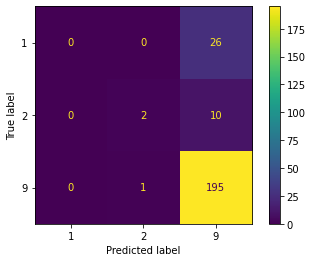

In [18]:
# visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=economic_model.classes_)
disp.plot()
plt.show()

In [19]:
# classification report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        26
           2       0.67      0.17      0.27        12
           9       0.84      0.99      0.91       196

    accuracy                           0.84       234
   macro avg       0.50      0.39      0.39       234
weighted avg       0.74      0.84      0.78       234



/Users/hur712/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
